In [1]:
import pandas as pd

# 엑셀 파일 경로
file_path = "가해자_음주정도별_주야별_교통사고.xlsx"

# 엑셀 파일 불러오기
xls = pd.ExcelFile(file_path)


c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
# '데이터' 시트에서 상위 2줄을 헤더로 로딩
df_raw = xls.parse('데이터', header=[0, 1])
df_raw.head()

1당음주정도별(1)    1당음주정도별(2)  주야별(1)      2019                                \
   1당음주정도별(1)    1당음주정도별(2)  주야별(1)        전체      전체.1      전체.2        1월   
0  1당음주정도별(1)    1당음주정도별(2)  주야별(1)  사고건수 (건)  사망자수 (명)  부상자수 (명)  사고건수 (건)   
1        음주운전   0.03~0.049%       주       214         4       374         -   
2         NaN           NaN       야       243         8       350         -   
3         NaN  0.05%~0.079%       주       903        30      1524        98   
4         NaN           NaN       야      2032        47      3316       224   

                                 ...      2023                                \
       1월.1      1월.2        2월  ...      9월.2       10월     10월.1     10월.2   
0  사망자수 (명)  부상자수 (명)  사고건수 (건)  ...  부상자수 (명)  사고건수 (건)  사망자수 (명)  부상자수 (명)   
1         -         -         -  ...        53        25         0        48   
2         -         -         -  ...        62        44         1        64   
3         1       164        83  ...       112        44         0        66   
4         6       353       217  ...       177        92         2       124   

                                                               
        11월     11월.1     11월.2       12월     12월.1     12월.2  
0  사고건수 (건)  사망자수 (명)  부상자수 (명)  사고건수 (건)  사망자수 (명)  부상자수 (명)  
1        25         2        45        31         0        45  
2        38         0        61        47         1        69  
3        59         1       102        62         2        99  
4        98         0       160       114         1       164  

[5 rows x 198 columns]

In [7]:
df_raw = df_raw.drop(columns=[('1당음주정도별(1)', '1당음주정도별(1)')])
df_raw.head()

1당음주정도별(2)  주야별(1)      2019                                          \
     1당음주정도별(2)  주야별(1)        전체      전체.1      전체.2        1월      1월.1   
0    1당음주정도별(2)  주야별(1)  사고건수 (건)  사망자수 (명)  부상자수 (명)  사고건수 (건)  사망자수 (명)   
1   0.03~0.049%       주       214         4       374         -         -   
2           NaN       야       243         8       350         -         -   
3  0.05%~0.079%       주       903        30      1524        98         1   
4           NaN       야      2032        47      3316       224         6   

                                 ...      2023                                \
       1월.2        2월      2월.1  ...      9월.2       10월     10월.1     10월.2   
0  부상자수 (명)  사고건수 (건)  사망자수 (명)  ...  부상자수 (명)  사고건수 (건)  사망자수 (명)  부상자수 (명)   
1         -         -         -  ...        53        25         0        48   
2         -         -         -  ...        62        44         1        64   
3       164        83         3  ...       112        44         0        66   
4       353       217         3  ...       177        92         2       124   

                                                               
        11월     11월.1     11월.2       12월     12월.1     12월.2  
0  사고건수 (건)  사망자수 (명)  부상자수 (명)  사고건수 (건)  사망자수 (명)  부상자수 (명)  
1        25         2        45        31         0        45  
2        38         0        61        47         1        69  
3        59         1       102        62         2        99  
4        98         0       160       114         1       164  

[5 rows x 197 columns]

In [59]:
# 데이터 부분 추출
df = df_raw[1:].copy()
df.head()

1당음주정도별(2) 주야별(1)  2019                                      ... 2023  \
     1당음주정도별(2) 주야별(1)    전체 전체.1  전체.2   1월 1월.1 1월.2   2월 2월.1  ... 9월.2   
1   0.03~0.049%      주   214    4   374    -    -    -    -    -  ...   53   
2           NaN      야   243    8   350    -    -    -    -    -  ...   62   
3  0.05%~0.079%      주   903   30  1524   98    1  164   83    3  ...  112   
4           NaN      야  2032   47  3316  224    6  353  217    3  ...  177   
5  0.08%~0.149%      주  1501   21  2475   76    1  135   92    3  ...  187   

                                                      
   10월 10월.1 10월.2  11월 11월.1 11월.2  12월 12월.1 12월.2  
1   25     0    48   25     2    45   31     0    45  
2   44     1    64   38     0    61   47     1    69  
3   44     0    66   59     1   102   62     2    99  
4   92     2   124   98     0   160  114     1   164  
5  108     0   183  133     2   225  130     1   214  

[5 rows x 197 columns]

In [60]:
for col in df.columns[:10]:  # 앞쪽 열만 예시로
    print(col)

('1당음주정도별(2)', '1당음주정도별(2)')
('주야별(1)', '주야별(1)')
('2019', '전체')
('2019', '전체.1')
('2019', '전체.2')
('2019', '1월')
('2019', '1월.1')
('2019', '1월.2')
('2019', '2월')
('2019', '2월.1')


In [61]:
df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]

# 컬럼명 변경
df.rename(columns={
    '1당음주정도별(2)_1당음주정도별(2)': '알코올농도',
    '주야별(1)_주야별(1)': '주야'
}, inplace=True)
df.head()

,알코올농도,주야,2019_전체,2019_전체.1,2019_전체.2,2019_1월,2019_1월.1,2019_1월.2,2019_2월,2019_2월.1,...,2023_9월.2,2023_10월,2023_10월.1,2023_10월.2,2023_11월,2023_11월.1,2023_11월.2,2023_12월,2023_12월.1,2023_12월.2
1,0.03~0.049%,주,214,4,374,-,-,-,-,-,...,53,25,0,48,25,2,45,31,0,45
2,NaN,야,243,8,350,-,-,-,-,-,...,62,44,1,64,38,0,61,47,1,69
3,0.05%~0.079%,주,903,30,1524,98,1,164,83,3,...,112,44,0,66,59,1,102,62,2,99
4,NaN,야,2032,47,3316,224,6,353,217,3,...,177,92,2,124,98,0,160,114,1,164
5,0.08%~0.149%,주,1501,21,2475,76,1,135,92,3,...,187,108,0,183,133,2,225,130,1,214


In [62]:
# NaN 값 보간 (알코올농도)
df['알코올농도'] = df['알코올농도'].fillna(method='ffill')
df['알코올농도']

C:\Users\USER\AppData\Local\Temp\ipykernel_24900\2122437053.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['알코올농도'] = df['알코올농도'].fillna(method='ffill')


1      0.03~0.049%
2      0.03~0.049%
3     0.05%~0.079%
4     0.05%~0.079%
5     0.08%~0.149%
6     0.08%~0.149%
7     0.15%~0.199%
8     0.15%~0.199%
9     0.20%~0.249%
10    0.20%~0.249%
11    0.25%~0.299%
12    0.25%~0.299%
13    0.30%~0.349%
14    0.30%~0.349%
15         0.35%이상
16         0.35%이상
17            측정불응
18            측정불응
19            측정불능
20            측정불능
21            정상운전
22            정상운전
Name: 알코올농도, dtype: object

In [63]:
print(df.columns[:10])

Index(['알코올농도', '주야', '2019_전체', '2019_전체.1', '2019_전체.2', '2019_1월',
       '2019_1월.1', '2019_1월.2', '2019_2월', '2019_2월.1'],
      dtype='object')


In [64]:
target_cols = [col for col in df.columns if any(
    col == f"{year}_전체" or
    col == f"{year}_전체.1" or
    col == f"{year}_전체.2"
    for year in range(2019, 2024)
)]
target_cols

['2019_전체',
 '2019_전체.1',
 '2019_전체.2',
 '2020_전체',
 '2020_전체.1',
 '2020_전체.2',
 '2021_전체',
 '2021_전체.1',
 '2021_전체.2',
 '2022_전체',
 '2022_전체.1',
 '2022_전체.2',
 '2023_전체',
 '2023_전체.1',
 '2023_전체.2']

In [66]:
# 필요한 컬럼 + 주야 + 알코올농도만 선택
df = df[['알코올농도', '주야'] + target_cols]
df.head()

,알코올농도,주야,2019_전체,2019_전체.1,2019_전체.2,2020_전체,2020_전체.1,2020_전체.2,2021_전체,2021_전체.1,2021_전체.2,2022_전체,2022_전체.1,2022_전체.2,2023_전체,2023_전체.1,2023_전체.2
1,0.03~0.049%,주,214,4,374,365,8,569,307,6,485,328,2,509,326,5,535
2,0.03~0.049%,야,243,8,350,562,17,877,490,6,750,451,9,670,434,5,650
3,0.05%~0.079%,주,903,30,1524,708,12,1152,610,12,937,659,18,1044,630,7,1028
4,0.05%~0.079%,야,2032,47,3316,1672,43,2647,1493,40,2280,1628,41,2544,1341,28,2041
5,0.08%~0.149%,주,1501,21,2475,1737,19,2844,1331,10,2122,1425,13,2342,1408,12,2301


In [67]:
for col in df.columns:
    print(col)

알코올농도
주야
2019_전체
2019_전체.1
2019_전체.2
2020_전체
2020_전체.1
2020_전체.2
2021_전체
2021_전체.1
2021_전체.2
2022_전체
2022_전체.1
2022_전체.2
2023_전체
2023_전체.1
2023_전체.2


In [68]:
# 수치형으로 변환 (문자열 -> 숫자)
for col in target_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 사고건수, 사망자수, 부상자수 컬럼 구분
accident_cols = [col for col in target_cols if col.endswith('.2')]
death_cols = [col for col in target_cols if col.endswith('.1')]
injury_cols = [col for col in target_cols if col.endswith('전체') and not col.endswith(('.1', '.2'))]

# 합산
df['부상자수'] = df[accident_cols].sum(axis=1)
df['사망자수'] = df[death_cols].sum(axis=1)
df['사고건수'] = df[injury_cols].sum(axis=1)



df.head()

,알코올농도,주야,2019_전체,2019_전체.1,2019_전체.2,2020_전체,2020_전체.1,2020_전체.2,2021_전체,2021_전체.1,2021_전체.2,2022_전체,2022_전체.1,2022_전체.2,2023_전체,2023_전체.1,2023_전체.2,부상자수,사망자수,사고건수
1,0.03~0.049%,주,214,4,374,365,8,569,307,6,485,328.0,2.0,509.0,326,5,535,2472.0,25.0,1540.0
2,0.03~0.049%,야,243,8,350,562,17,877,490,6,750,451.0,9.0,670.0,434,5,650,3297.0,45.0,2180.0
3,0.05%~0.079%,주,903,30,1524,708,12,1152,610,12,937,659.0,18.0,1044.0,630,7,1028,5685.0,79.0,3510.0
4,0.05%~0.079%,야,2032,47,3316,1672,43,2647,1493,40,2280,1628.0,41.0,2544.0,1341,28,2041,12828.0,199.0,8166.0
5,0.08%~0.149%,주,1501,21,2475,1737,19,2844,1331,10,2122,1425.0,13.0,2342.0,1408,12,2301,12084.0,75.0,7402.0


In [70]:
# 알코올농도별로 주야 합산
summary = df.groupby('알코올농도')[['사고건수', '사망자수', '부상자수']].sum().reset_index()
summary

,알코올농도,사고건수,사망자수,부상자수
0,0.03~0.049%,3720.0,70.0,5769.0
1,0.05%~0.079%,11676.0,278.0,18513.0
2,0.08%~0.149%,33383.0,365.0,53844.0
3,0.15%~0.199%,17940.0,238.0,29476.0
4,0.20%~0.249%,5723.0,144.0,9269.0
5,0.25%~0.299%,1265.0,45.0,2086.0
6,0.30%~0.349%,237.0,8.0,379.0
7,0.35%이상,95.0,7.0,144.0
8,정상운전,960997.0,13441.0,1381739.0
9,측정불능,569.0,30.0,811.0


In [ ]:
#치명률률 : 100건당 사망자 수
summary['치명률'] = summary.apply(
    lambda row: row['사망자수'] / row['사고건수'] * 100 if row['사고건수'] != 0 else 0,
    axis=1
)
summary

,알코올농도,사고건수,사망자수,부상자수,치명률
0,0.03~0.049%,3720.0,70.0,5769.0,1.881720
1,0.05%~0.079%,11676.0,278.0,18513.0,2.380952
2,0.08%~0.149%,33383.0,365.0,53844.0,1.093371
3,0.15%~0.199%,17940.0,238.0,29476.0,1.326644
4,0.20%~0.249%,5723.0,144.0,9269.0,2.516163
5,0.25%~0.299%,1265.0,45.0,2086.0,3.557312
6,0.30%~0.349%,237.0,8.0,379.0,3.375527
7,0.35%이상,95.0,7.0,144.0,7.368421
8,정상운전,960997.0,13441.0,1381739.0,1.398652
9,측정불능,569.0,30.0,811.0,5.272408


In [ ]:
import numpy as np
import re




def parse_alcohol_level(level):
    # 범위 형태: '0.05~0.079%'
    if '~' in level:
        try:
            level = level.replace('%', '')  # % 제거
            low, high = level.split('~')
            return (float(low) + float(high)) / 2
        except:
            return np.nan

    # 이상 형태: '0.35%이상'
    elif '이상' in level:
        try:
            num = ''.join(ch for ch in level if ch.isdigit() or ch == '.' or ch == ',')
            return float(num)
        except:
            return np.nan

    # 정상운전, 측정불능 등은 NaN
    else:
        return np.nan

# 재적용
summary['알코올농도_숫자'] = summary['알코올농도'].apply(parse_alcohol_level)


In [83]:
summary

,알코올농도,사고건수,사망자수,부상자수,치명률,알코올농도_숫자
0,0.03~0.049%,3720.0,70.0,5769.0,1.881720,0.0395
1,0.05%~0.079%,11676.0,278.0,18513.0,2.380952,0.0645
2,0.08%~0.149%,33383.0,365.0,53844.0,1.093371,0.1145
3,0.15%~0.199%,17940.0,238.0,29476.0,1.326644,0.1745
4,0.20%~0.249%,5723.0,144.0,9269.0,2.516163,0.2245
5,0.25%~0.299%,1265.0,45.0,2086.0,3.557312,0.2745
6,0.30%~0.349%,237.0,8.0,379.0,3.375527,0.3245
7,0.35%이상,95.0,7.0,144.0,7.368421,0.3500
8,정상운전,960997.0,13441.0,1381739.0,1.398652,NaN
9,측정불능,569.0,30.0,811.0,5.272408,NaN


In [84]:
filtered = summary.dropna(subset=['알코올농도_숫자', '치명률'])
correlation = filtered['알코올농도_숫자'].corr(filtered['치명률'])
print("상관계수:", correlation)

상관계수: 0.7332835383446372


In [102]:
print(f"설정된 폰트 이름: {font_name}")

설정된 폰트 이름: NanumGothic


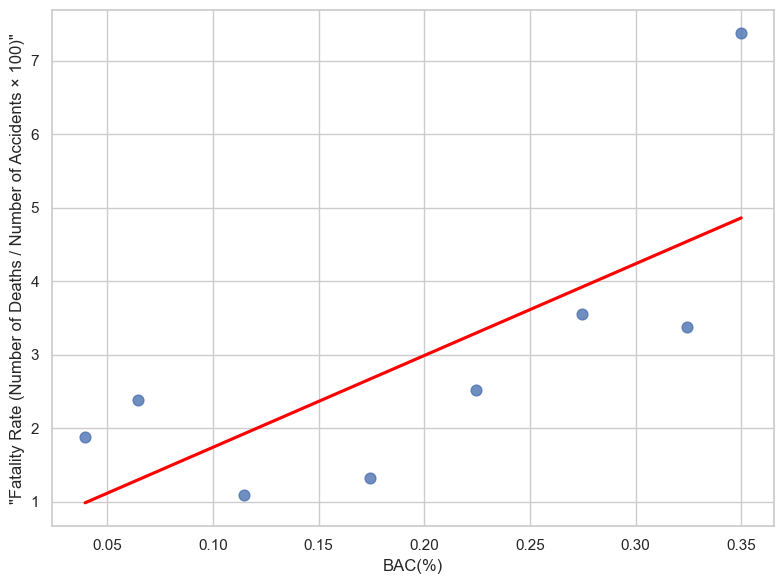

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

font_path = './NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()

plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False
# NaN 제거된 데이터 사용
filtered = summary.dropna(subset=['알코올농도_숫자', '치명률'])

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 산점도 + 회귀선
plt.figure(figsize=(8, 6))
sns.regplot(
    data=filtered,
    x='알코올농도_숫자',
    y='치명률',
    ci=None,          # 신뢰구간 표시 안 함
    scatter_kws={'s': 60, 'alpha': 0.8},
    line_kws={'color': 'red'}
)

# 라벨과 제목
plt.xlabel('BAC(%)')
plt.ylabel('"Fatality Rate (Number of Deaths / Number of Accidents × 100)"')

plt.tight_layout()


plt.savefig('alcohol_vs_fatality.png')
# 그래프 출력
plt.show()

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
